### Домашнее задание по теме «Ансамблирование»

Теперь решаем задачу регрессии - предскажем цены на недвижимость. 

Использовать датасет https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data (train.csv)

Построить случайный лес, вывести важность признаков

Обучить стекинг как минимум 3х моделей, использовать хотя бы 1 линейную модель и 1 нелинейную

В качестве решения: Jupyter notebook с кодом, комментариями и графиками

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
# from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# Из описания датасета следует, что пустые значения поля Alley значат, что аллеи нет, заменим пустые на 'No_Alley'
data['Alley'] = data['Alley'].fillna('No_Alley')

# пустые значения поля Fence значат, что забора нет, заменим пустые на 'No_Fence'
data['Fence'] = data['Fence'].fillna('No_Fence')

# пустые значения поля PoolQC значат, что бассейна нет, заменим пустые на 'No_Pool'
data['PoolQC'] = data['PoolQC'].fillna('No_Pool')

# пустые значения поля MiscFeature значат отсутствие доп.функций, заменим пустые на 'No_MF'
data['MiscFeature'] = data['MiscFeature'].fillna('No_MF')

# пустые значения поля FireplaceQu значат отсутствие камина, заменим пустые на 'No_FQ'
data['FireplaceQu'] = data['FireplaceQu'].fillna('No_FQ')

# пустые значения полей GarageType, GarageFinish, GarageQual, GarageCond значат отсутствие гаража, заменим пустые на 'No_G'
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col] = data[col].fillna('No_G')

# пустые значения полей GarageYrBlt, GarageArea, GarageCars заменим на 0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)
    
# пустые значения в LotFrontage заменим на медианную ширину улицы в данном районе
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# пустые значения полей BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1,BsmtFinType2 значат отсутствие подвала, заменим на 'No_B'
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('No_B')
    
# пустые значения полей MasVnrArea, MasVnrType заменим площадь на 0, а тип на 'None' 
data['MasVnrType'] = data['MasVnrType'].fillna('None')
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

# в Electrical есть одно пустое значение, заменим его модой
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

data = data.drop(columns='Id')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.199658,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.431902,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,70.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


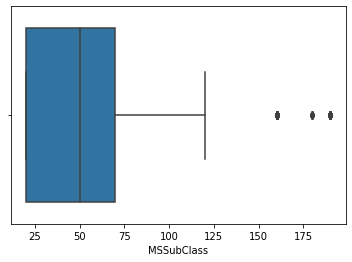

In [8]:
# Посмотрим на выбросы
sns.boxplot(data['MSSubClass'])

In [9]:
data = data[data['MSSubClass'] < 125]

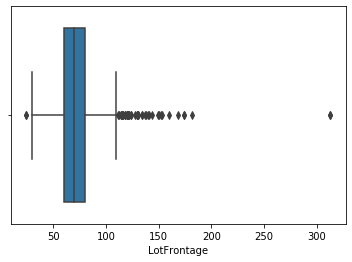

In [10]:
sns.boxplot(data['LotFrontage'])

In [11]:
data = data[data['LotFrontage'] < 120]

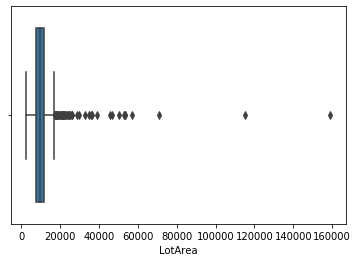

In [12]:
sns.boxplot(data['LotArea'])

In [13]:
data = data[data['LotArea'] < 20000]

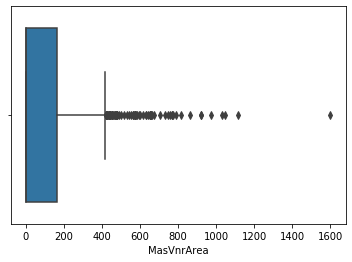

In [14]:
sns.boxplot(data['MasVnrArea'])

In [15]:
data = data[data['MasVnrArea'] < 600]


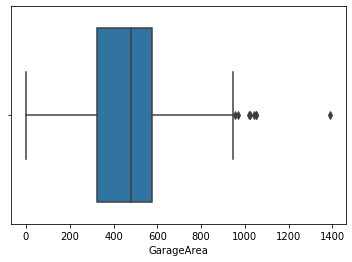

In [16]:
sns.boxplot(data['GarageArea'])

In [17]:
data = data[data['GarageArea'] < 1000]
data.shape

(1242, 80)

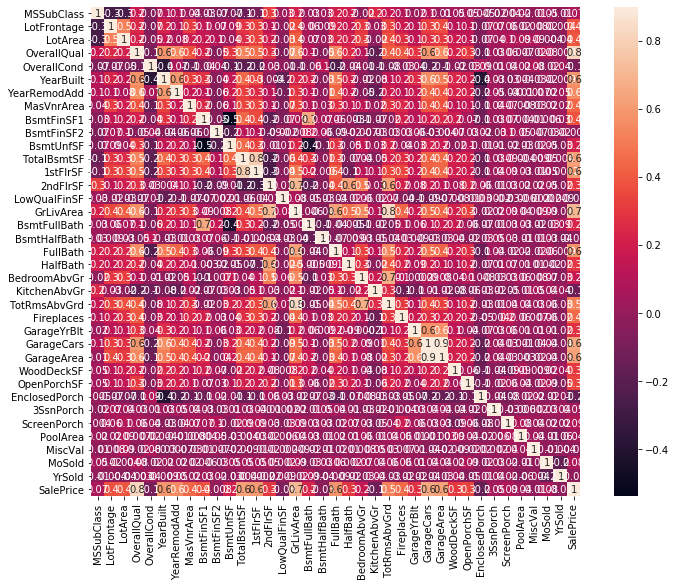

In [18]:
# Построим Матрицу корреляции

plt.subplots(figsize=(12,9))
sns.heatmap(data.corr(), annot = True, fmt='.1g', vmax=0.9, square=True)

In [19]:
# Видно сильную корреляцию GarageCars и GarageArea

data['GarageCars'].value_counts()

2    704
1    331
3    139
0     64
4      4
Name: GarageCars, dtype: int64

In [20]:
data['GarageArea'].value_counts()

0      64
576    38
240    36
440    33
484    31
       ..
595     1
594     1
590     1
586     1
968     1
Name: GarageArea, Length: 399, dtype: int64

In [21]:
# Удалим GarageCars и оставим только GarageArea
data = data.drop(columns='GarageCars')

In [22]:
#Находим категориальные признаки
cat_feat = list(data.dtypes[data.dtypes == object].index)

#отфильтруем непрерывные признаки
num_feat = [f for f in data if f not in (cat_feat + ['SalePrice'])]

# Смотрим сколько у нас значений по каждому категориальному признаку
cat_nunique = data[cat_feat].nunique()

#Чтобы в разы не увеличивать число признаков при построении dummy,
#будем использовать категориальные признаки с < 30 уникальных значений
cat_feat = list(cat_nunique[cat_nunique < 5].index)
len(cat_feat)

13

In [23]:
# Создаем дамми-переменные для категорий

dummy_ = pd.get_dummies(data[cat_feat], columns=cat_feat)
dummy_cols = list(set(dummy_))
dummy_ = dummy_[dummy_cols]

In [24]:
# Поделим на train и test

X = pd.concat([data[num_feat], dummy_], axis=1)
y = data['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [25]:
# Случайный лес

from sklearn.ensemble import RandomForestRegressor

clf_rf = RandomForestRegressor(n_estimators=10, max_depth=5, min_samples_leaf=20, max_features=0.5, n_jobs=-1)
clf_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features=0.5, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=20,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [26]:
y_pred_train_rf = clf_rf.predict(X_train)
y_pred_test_rf = clf_rf.predict(X_test)

clf_rf.score(X_test, y_test)

0.7990297259419336

In [27]:
# Важность признаков

feature_importances = pd.DataFrame(clf_rf.feature_importances_, index=X.columns, 
                                   columns=['importances']).sort_values('importances', ascending=False)
feature_importances

,importances
OverallQual,0.489769
YearBuilt,0.227979
GrLivArea,0.121419
1stFlrSF,0.028092
TotalBsmtSF,0.023132
...,...
Street_Grvl,0.000000
PoolQC_Fa,0.000000
Alley_No_Alley,0.000000
Alley_Grvl,0.000000


## Объединим модели

In [28]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)


In [29]:
# Oбучим стекинг
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVR
# from sklearn.preprocessing import PolynomialFeatures
# from mlxtend.regressor import StackingCVRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [30]:
regressor = StackingRegressor(
    [
        ('kn', KNeighborsRegressor()),
        ('lr', LinearRegression()),
        ('dt', DecisionTreeRegressor())
    ],
RandomForestRegressor())



In [31]:
regressor.fit(X_train, y_train)

StackingRegressor(cv=None,
                  estimators=[('kn',
                               KNeighborsRegressor(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform')),
                              ('lr',
                               LinearRegression(copy_X=True, fit_intercept=True,
                                                n_jobs=None, normalize=False)),
                              ('dt',
                               DecisionTreeRegressor(ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=None,
                                                     max_featu

In [32]:
y_pred_proba_lr = regressor.named_estimators_['lr'].score(X_test, y_test)
y_pred_proba_kn = regressor.named_estimators_['kn'].score(X_test, y_test)
y_pred_proba_dt = regressor.named_estimators_['dt'].score(X_test, y_test)
y_pred_proba = regressor.score(X_test, y_test)

print(y_pred_proba_lr, y_pred_proba_kn, y_pred_proba_dt, y_pred_proba)

0.8558071526178591 0.6359725600442035 0.7638809910390818 0.8740373726658939


In [33]:
regressor.final_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)